In [1]:
import networkx as nx
import networkit as nk
from sna_samplers import *
from scipy import stats
from typing import Union
import matplotlib.pyplot as plt
import random

In [2]:
def PlotRandomEdgeSampler(graph,number_of_nodes = 100,number_of_edges = 100):
    sampler = RandomEdgeSampler(number_of_edges=number_of_edges)
    return sampler.sample(graph)

def PlotRandomNodeSampler(graph,number_of_nodes = 100):
    sampler = RandomNodeSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

def PlotRandomWalkSampler(graph,number_of_nodes = 100):
    sampler = RandomWalkSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

def PlotShortestPathSampler(graph,number_of_nodes = 100):
    sampler = ShortestPathSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

def PlotShortestPathModifiedSampler(graph,number_of_nodes = 100):
    sampler = ShortestPathModifiedSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

In [3]:
# metrics
def RelativeError(graph, new_graph):
    acc = nx.average_clustering(graph)
    accn = nx.average_clustering(new_graph)
    return abs(acc-accn)/acc

def RootMeanSquare(graph, new_graph):
    cc = nx.clustering(graph)
    ccn = nx.clustering(new_graph)
    temp = 0
    for n in ccn.keys():
        temp += (cc[n] - ccn[n])**2
    temp = (temp/len(ccn))**(1/2)
    return temp

def KSTest(graph, new_graph):
    dd = nx.degree(graph)
    ddn = nx.degree(new_graph)
    ddl, ddln= [],[]
    for i in dd:
        ddl.append(i[1])
    for i in ddn:
        ddln.append(i[1])
    size = max(max(dd,key=lambda x:x[1]),max(dd,key=lambda x:x[1]))[1]
    temp = [0 for i in range(size+1)]
    tempn = [0 for i in range(size+1)]
    for i in range(size+1):
        temp[i] = ddl.count(i)
    for i in range(size+1):
        tempn[i] = ddln.count(i)
    return stats.kstest(temp,tempn).statistic
    
    

In [7]:
# reader = GraphReader("facebook")
# graph = reader.get_graph()
graph = nx.newman_watts_strogatz_graph(1000, 20, 0.05)

0.9773785330576994
0.6404425700968733
0.07407407407407407


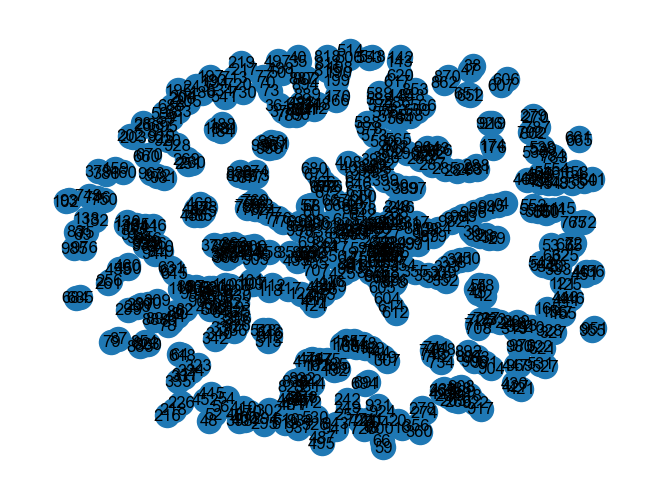

In [8]:
new_graph = PlotRandomEdgeSampler(graph,number_of_edges=int(graph.number_of_edges()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

0.5925921261314611
0.5651677495824801
0.14814814814814814


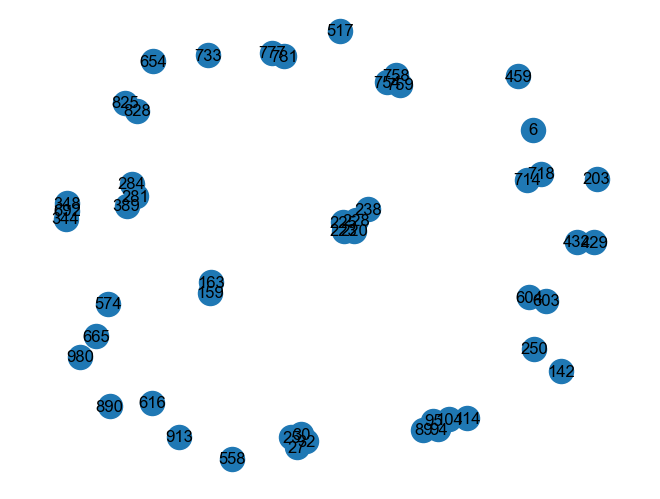

In [9]:
new_graph = PlotRandomNodeSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

0.09682661355773664
0.1915938320066138
0.3333333333333333


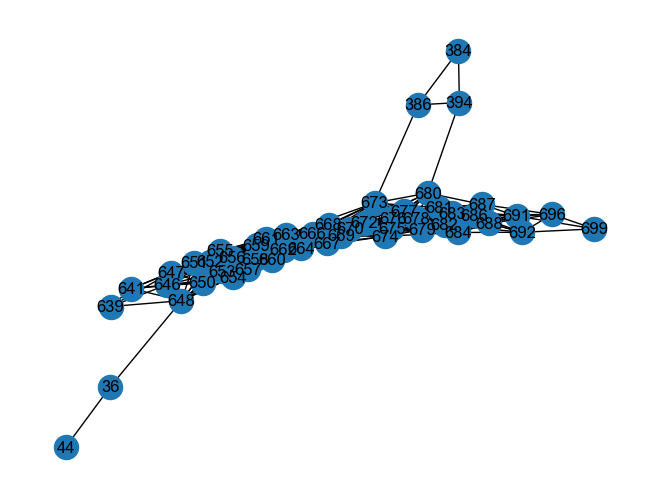

In [10]:
new_graph = PlotRandomWalkSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

0.5572294173689115
0.47786306911384024
0.14814814814814814


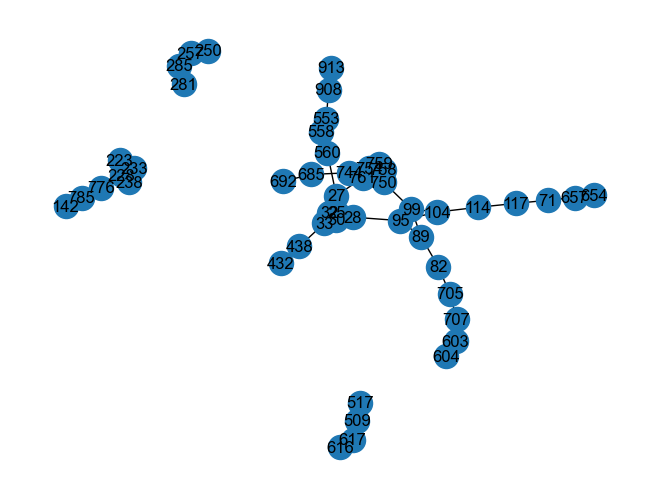

In [11]:
new_graph = PlotShortestPathSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

0.06861685541829256
0.279536325858532
0.14814814814814814


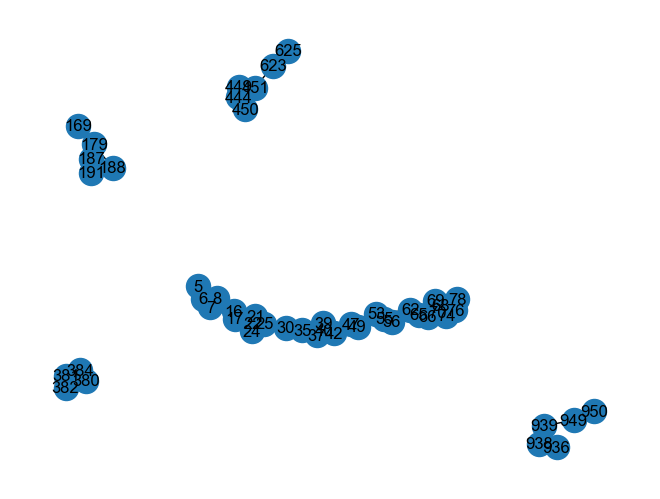

In [13]:
new_graph = PlotShortestPathModifiedSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()